![picture](https://drive.google.com/uc?export=view&id=1wjkS0L1i30melKIDhytUFnlAbPCRUwIb)


<hr color='#008B8B'>

<font size="5" color = '#740001'> <b>CS5346 S2-AY2022-23: Information Visualisation - OTOT TASK A3 </b></font>
    
<font size="3" color = '#D3A625'><i>Name: Varsha Singh</i></font> 
   

# Objective

<font size = 5  color = '#740001'> <b>Magical Insights: Visualizing the World of Harry Potter through Data</b> </font>

This task aims to analyze the [Harry Potter Movies Dataset](https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset) through visualizations. Our aim is to gain insights and answer specific queries while comprehending the different visual encoding and channel techniques.

<img src="https://wallpapercave.com/wp/wp4543113.jpg"  width = 700 length = 700>




In [1]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly import tools

from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import nltk
from nltk.corpus import stopwords
import stylecloud

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
Colorcode for headings/titles are inspired by <a href="https://www.color-meanings.com/harry-potter-house-colors-meaning-hogwarts/" class="alert-link">Hogwarts House Colors</a>


# About the dataset

The [Harry Potter Movies Dataset](https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset) is available on Kaggle. 

Using below 5 dataset namely - **Movies**, **Chapters**, **Characters**, **Places**, and **Dialogue**
PSB data dictionary - 

|Table     |Field         |Description                                     |
| :-- | :-- | :-- | 
|**Movies**|Movie ID      |Unique identifier for each movie                |
|          |Movie Title   |Full movie name                                 |
|          |Release Year  |Year the movie was released in theaters         |
|          |Runtime       |Length of the movie in minutes                  |
|          |Budget        |Budget for the movie is US Dollars              |
|          |Box Office    |Box office revenue for the movie in US Dollars  |
|**Chapters**|Chapter ID    |Unique identifier for each chapter              |
|          |Chapter Name  |Name of the chapter in the movie script         |
|          |Movie ID      |Foreign key to match with Movies table          |
|          |Movie Chapter |Chapter number within each movie script         |
|**Characters**|Character ID  |Unique identifier for each character            |
|          |Character Name|Name of the character                           |
|          |Species       |Species of the character                        |
|          |Gender        |Gender of the character                         |
|          |House         |Hogwarts house (or name of other magical school)|
|          |Patronus      |Patronus of the character                       |
|          |Wand (Wood)   |Type of wood for the character's wand           |
|          |Wand (Core)   |Core for the character's wand                   |
|**Places**|Place ID      |Unique identifier for each place                |
|          |Place Name    |Name of the place                               |
|          |Place Category|Type of place                                   |
|**Dialogue**|Dialogue ID   |Unique identifier for each line of dialogue     |
|          |Chapter ID    |Foreign key to match with Chapters table        |
|          |Place ID      |Foreign key to match with Places table          |
|          |Character ID  |Foreign key to match with Characters table      |
|          |Dialogue      |Line of dialogue from the movie script          |


## Data Preprocessing 

### Movies Dataset

In [2]:
#Read data 
movies_df = pd.read_csv("Movies.csv")
display(movies_df.head())
movies_df.info()

,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,"$130,000,000","$796,700,000"
3,4,Harry Potter and the Goblet of Fire,2005,157,"$150,000,000","$896,400,000"
4,5,Harry Potter and the Order of the Phoenix,2007,138,"$150,000,000","$942,000,000"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie ID      8 non-null      int64 
 1   Movie Title   8 non-null      object
 2   Release Year  8 non-null      int64 
 3   Runtime       8 non-null      int64 
 4   Budget        8 non-null      object
 5   Box Office    8 non-null      object
dtypes: int64(3), object(3)
memory usage: 512.0+ bytes


In [3]:
#removing the common phrase "Harry Potter and the" from the title to ease visualisation text
movies_df["Movie Title"]= movies_df["Movie Title"].str.replace("Harry Potter and the","")

In [4]:
# convert budget and box office columns to numeric type
movies_df['Budget'] = movies_df['Budget'].str.replace(',', '').str.replace('$', '').astype(float)
movies_df['Box Office'] = movies_df['Box Office'].str.replace(',', '').str.replace('$', '').astype(float)

### Chapters Dataset

In [5]:
chapter_df = pd.read_csv("Chapters.csv",encoding = 'unicode_escape')
display(chapter_df.head())
chapter_df.info()

,Chapter ID,Chapter Name,Movie ID,Movie Chapter
0,1,Doorstep Delivery,1,1
1,2,The Vanishing Glass,1,2
2,3,Letters from No One,1,3
3,4,Keeper of the Keys,1,4
4,5,Diagon Alley,1,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Chapter ID     234 non-null    int64 
 1   Chapter Name   234 non-null    object
 2   Movie ID       234 non-null    int64 
 3   Movie Chapter  234 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.4+ KB


In [6]:
#Use Movies dataset to add Movie Title to Chapter Dataset 
chapter_df = chapter_df.merge(movies_df[['Movie ID','Movie Title']], how='left', on='Movie ID' )
chapter_df.shape

(234, 5)

In [7]:
chapter_df.head(2)

,Chapter ID,Chapter Name,Movie ID,Movie Chapter,Movie Title
0,1,Doorstep Delivery,1,1,Philosopher's Stone
1,2,The Vanishing Glass,1,2,Philosopher's Stone


### Character Dataset

In [8]:
character_df = pd.read_csv("Characters.csv",encoding = 'unicode_escape')
character_df.drop(columns=(['Patronus','Wand (Wood)','Wand (Core)']), inplace =True)
display(character_df.head())
character_df.info()

,Character ID,Character Name,Species,Gender,House
0,1,Harry Potter,Human,Male,Gryffindor
1,2,Ron Weasley,Human,Male,Gryffindor
2,3,Hermione Granger,Human,Female,Gryffindor
3,4,Albus Dumbledore,Human,Male,Gryffindor
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.6+ KB


### Place Dataset

In [9]:
place_df = pd.read_csv("Places.csv")
display(place_df.head())
place_df.info()

,Place ID,Place Name,Place Category
0,1,Flourish & Blotts,Diagon Alley
1,2,Gringotts Wizarding Bank,Diagon Alley
2,3,Knockturn Alley,Diagon Alley
3,4,Ollivanders,Diagon Alley
4,5,The Leaky Cauldron,Diagon Alley


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Place ID        74 non-null     int64 
 1   Place Name      74 non-null     object
 2   Place Category  74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


### Dialogue Dataset

In [10]:
dialogue_df = pd.read_csv("Dialogue.csv",encoding = 'unicode_escape')
display(dialogue_df.head())
dialogue_df.info()

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue
0,1,1,8,4,I should have known that you would be here...P...
1,2,1,8,7,"Good evening, Professor Dumbledore. Are the ru..."
2,3,1,8,4,"I'm afraid so, Professor. The good, and the bad."
3,4,1,8,7,And the boy?
4,5,1,8,4,Hagrid is bringing him.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dialogue ID   7444 non-null   int64 
 1   Chapter ID    7444 non-null   int64 
 2   Place ID      7444 non-null   int64 
 3   Character ID  7444 non-null   int64 
 4   Dialogue      7444 non-null   object
dtypes: int64(4), object(1)
memory usage: 290.9+ KB


In [11]:
#Use Chapter dataset to add Movie Title to Dialogue Dataset 
dialogue_df = dialogue_df.merge(chapter_df[['Chapter ID','Movie Title']], how='left', on='Chapter ID' )
dialogue_df.shape

(7444, 6)

In [12]:
#Use Character dataset to add Character Name to Dialogue Dataset 
dialogue_df = dialogue_df.merge(character_df[['Character ID','Character Name']], how='left', on='Character ID' )
dialogue_df.shape

(7444, 7)

In [13]:
#Use Place dataset to add Place Category to Dialogue Dataset 
dialogue_df = dialogue_df.merge(place_df[['Place ID','Place Category']], how='left', on='Place ID' )
dialogue_df.shape

(7444, 8)

In [14]:
dialogue_df.drop(columns=['Dialogue ID','Chapter ID','Place ID','Character ID'],inplace = True )

In [15]:
dialogue_df.head(2)

,Dialogue,Movie Title,Character Name,Place Category
0,I should have known that you would be here...P...,Philosopher's Stone,Albus Dumbledore,Dwellings
1,"Good evening, Professor Dumbledore. Are the ru...",Philosopher's Stone,Minerva McGonagall,Dwellings


# Query 1

<font size="5" color = '#740001'> <b>Tracking the Financial Success of Harry Potter Movies </b></font>

In [31]:
#Add scatter plot for budget
budget_trace = go.Scatter(
    x=movies_df["Movie Title"],
    y=movies_df["Budget"],
    name="Budget",
    mode="lines+markers",
    line=dict(color='#D3A625', width=2), 
    marker=dict(symbol='circle', size=10), 
    text=movies_df["Release Year"] 
)

#Add scatter plot for box office 
box_office_trace = go.Scatter(
    x=movies_df["Movie Title"],
    y=movies_df["Box Office"],
    name="Box Office",
    mode="lines+markers",
    line=dict(color='#740001', width=2), 
    marker=dict(symbol='circle', size=10), 
    text=movies_df["Release Year"] 
)


layout = go.Layout(
    title="Tracking the Financial Success of Harry Potter Movies",
    xaxis=dict(title="Movie Title"),
    yaxis=dict(title="Amount in US Dollars"),
    template = 'plotly_white',height=600, width=1000,
)

# create the chart figure
fig = go.Figure(data=[budget_trace, box_office_trace], layout=layout)

# show the chart
fig.show()


In this visualization, we aim to look at the Budget and Box Office Performance of Harry Potter Films

**Data Preprocessing** 
- The common phrase "Harry Potter and the" is removed from movie title to make it more readable 
- Column `Budget` and `Box Office` are preprocessed to remove special character and coverted to float. 

**Visual Encoding**
  - This visualisation is a **scatter plot**
  - **x-axis** show the 8 Harry Potter's movies name 
  - **y-axis** shows amount in US dollars
  - **Gryffindor Gold colored line** shows the budget where each **marker** represents the budget of the respective movie
  - **Gryffindor Red colored line** shows the Box Office data where each **marker** represents the box office collection of the respective movie. 
  - The **text label** on each marker provides details like Movie Title, Release Year and Amount. 
  
**Insights**
- Out of all 8 Harry Potter movies, Harry Potter and the Deathly Hallows Part 2 has the highest box office revenue.
- Generally, there is a correlation between a movie's budget and its box office revenue, where higher budgets tend to result in higher box office collections. However, the movie Harry Potter and the Prisoner of Azkaban does not follow this trend. 

# Query  2

<font size="5" color = '#740001'> <b>Tracking the Dialogue of Harry Potter's Top Three Characters</b></font>

In [18]:
dialogue_count=dialogue_df.groupby('Character Name').agg({'Dialogue': 'count'}).reset_index().rename(columns={'Dialogue': 'count'}).sort_values('count', ascending=False).head(10)
fig = px.bar(dialogue_count, x='Character Name', y='count',text='count',color_discrete_sequence=['#740001'],
             title='Top 10 characters with Most Dialogues')
fig.update_yaxes(title_text='Number of Dialogues')
fig.update_xaxes(title_text='Character')
fig.update_layout(
    template = 'plotly_white',height=700, width=1000,
)
fig.show()

In [19]:
#color link - https://tvtropes.org/pmwiki/pmwiki.php/Characters/HarryPotterTheTrio#:~:text=Colour%2DCoded%20Characters%3A%20Specifically%20in,%2C%20and%20Hermione%20(pink).
char_color = {
    'Harry Potter': '#87CEFA',
    'Hermione Granger':'#F8C8DC',
    'Ron Weasley': 'orange'}

# Define the order of movie titles
movie_order = movies_df['Movie Title'].tolist()

# Filter the data to keep only the top 5 characters
top_characters = dialogue_df['Character Name'].value_counts().nlargest(3).index.tolist()
df = dialogue_df[dialogue_df['Character Name'].isin(top_characters)]

# Group the data by movie and character, and count the number of lines of dialogue
df = df.groupby(['Movie Title', 'Character Name']).agg({'Dialogue': 'count'}).reset_index()

# Create a stacked bar chart using Plotly
fig = px.bar(df, x='Movie Title', y='Dialogue', color='Character Name',text='Dialogue',color_discrete_map=char_color,
             barmode='stack', title='Tracking the Dialogue of Harry Potter\'s Top Three Characters',
            category_orders={'Movie Title': movie_order})

fig.update_layout(template = 'plotly_white',height=700, width=1000,)

fig.show()

The two visualizations aim to explore the dialogue count of characters in the Harry Potter movie series. The first visualization analyzes the main characters in the series, while the second visualization examines how the dialogue count of the three main characters, Harry, Hermione, and Ron, has changed over the course of the series

**Data Preprocessing** 
- Chapter dataset and Character dataset are used to extract movie titles and character names, which are then merged with the dialogue dataset.

**Visual Encoding**
  - This visualisation is a **stacked bar chart**
  - **x-axis** displays the eight movies in the Harry Potter series
  - **y-axis** shows dialouge count 
  - The **color of the bars** epresents the three main characters, Harry, Hermione, and Ron
  - The **height of the bars** corresponds to the number of dialogues delivered by each character
  - The **text label** on each bar provides a numerical value of dialouge count count. 
  
**Insights**
- Harry Potter has the most dialogue in all of the movies.
- Hermione had the fewest dialogues in the first two movies, but she played a significant role in Prisoner of Azkaban, where she and Harry went back in time, and in Deathly Hallows Part 1, where they searched for Horcruxes.


# Query 3

<font size="5" color = '#740001'> <b> Topic Modeling Harry Potter Dialogues with LDA</b></font>

In [20]:
harry_df = dialogue_df[dialogue_df['Character Name']=='Harry Potter']

In [21]:
docs_raw = harry_df['Dialogue'].values

In [22]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(docs_raw)
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)

In [23]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(random_state=0)

In [24]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.292770  0.028729       1        1  12.811709
9     -0.031665  0.006158       2        1  12.254576
7      0.078969  0.098021       3        1  10.650394
4     -0.044786  0.083934       4        1  10.046396
0     -0.198647  0.228607       5        1   9.548640
3      0.232421 -0.112672       6        1   9.138011
6      0.034554 -0.053502       7        1   9.069571
5     -0.200913 -0.213688       8        1   9.030842
2     -0.051214  0.182593       9        1   8.910294
1     -0.111488 -0.248181      10        1   8.539566, topic_info=        Term        Freq       Total Category  logprob  loglift
16       don  113.000000  113.000000  Default  30.0000  30.0000
72       sir  107.000000  107.000000  Default  29.0000  29.0000
35  hermione   76.000000   76.000000  Default  28.0000  28.0000
66       ron   72.000000   72.000000  Default  27.0000  27.0000
44      know  105.000000  105.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
19   exactly    0.100560   13.298669  Topic10  -7.7162  -2.4242
22      fine    0.100560   12.608120  Topic10  -7.7162  -2.3709
53      mean    0.100560   33.964576  Topic10  -7.7162  -3.3619
9       dead    0.100558   14.990803  Topic10  -7.7162  -2.5440
27       got    0.100558   53.524271  Topic10  -7.7162  -3.8167

[446 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         2  0.920646    aren
1         6  0.941917     ask
2         5  0.958625    away
3         3  0.153090  better
3         5  0.076545  better
...     ...       ...     ...
99        7  0.937368   wrong
100       7  0.987118    yeah
101       2  0.353633   years
101       3  0.618857   years
102       9  0.979233     yes

[149 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 8, 5, 1, 4, 7, 6, 3, 2])

In this visualisation, we will aim to detect and display the most common topics in the dialogous given by Harry Potter.

**Data Preprocession** 
- Data is preprocessed by filtering only Harry Potter's dialogues
- Accents are removed from the text
- common stop words are remmoved
- text is converted to lower case, 
- regular expression is used that matches words consisting of at least three letters. This filters out words with fewer than three letters, which are often not useful for analysis.
- Words that occur in more than 50% of the documents are excluded as they typically not informative.
- Words that occur in fewer than 10 documents are excluded as they typically not very informative.

**Visual Encoding**
  - This visualisation LDA topic modelling. 
  - The area on the left shows a **scatter plot** of the topics. 
  - Each **circle** represents a topic, and the **size of the circle** corresponds to the prevalence of the topic in the corpus. The topics are positioned so that similar topics are closer together.
  - The area on the right shows a list of the most relevant terms for the selected topic. These terms are ranked by their probability of belonging to the topic.
  - When a topic is selected in the scatter plot, it shows a bar chart of the top 30 terms for the selected topic. The terms are ranked by their probability of belonging to the topic, and the **length of the bars** represents the probability.
  
**Insights**
- Topic 10 is specifically about Voldemort and Horcruxes, which are sources of his power.
- Other topics are dedicated to specific characters, such as **Ron** (topic 8), **Hermione** (topic 6), **Professor Dumbledore and Professor Snape** (topic 9), **Harry's parents and Sirius Black** (topic 3), and **Dobby and Luna**, who helped Harry towards the end of the series (topic 7)
- We also see that, while topic number 1 is the largest, the words in this topic are general and don't point to anything specific. This could be considered as a "noisy" topic.

# Query 4

<font size="5" color = '#740001'> <b> Word Cloud of Dialogues from the Harry Potter Movies </b></font>

In [25]:
text = " ".join(dialogue_df['Dialogue'].values)

# Download the stopwords list if necessary
nltk.download('stopwords')

# Remove the stopwords from the text
stopwords = set(stopwords.words('english'))
words = [word for word in text.split() if word.lower() not in stopwords]
clean_text = ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pallavi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
stylecloud.gen_stylecloud(clean_text, 
                          size = 1024,                         
                          icon_name = "fas fa-hat-wizard",
                          palette='colorbrewer.sequential.Blues_5',
                          background_color ='black')

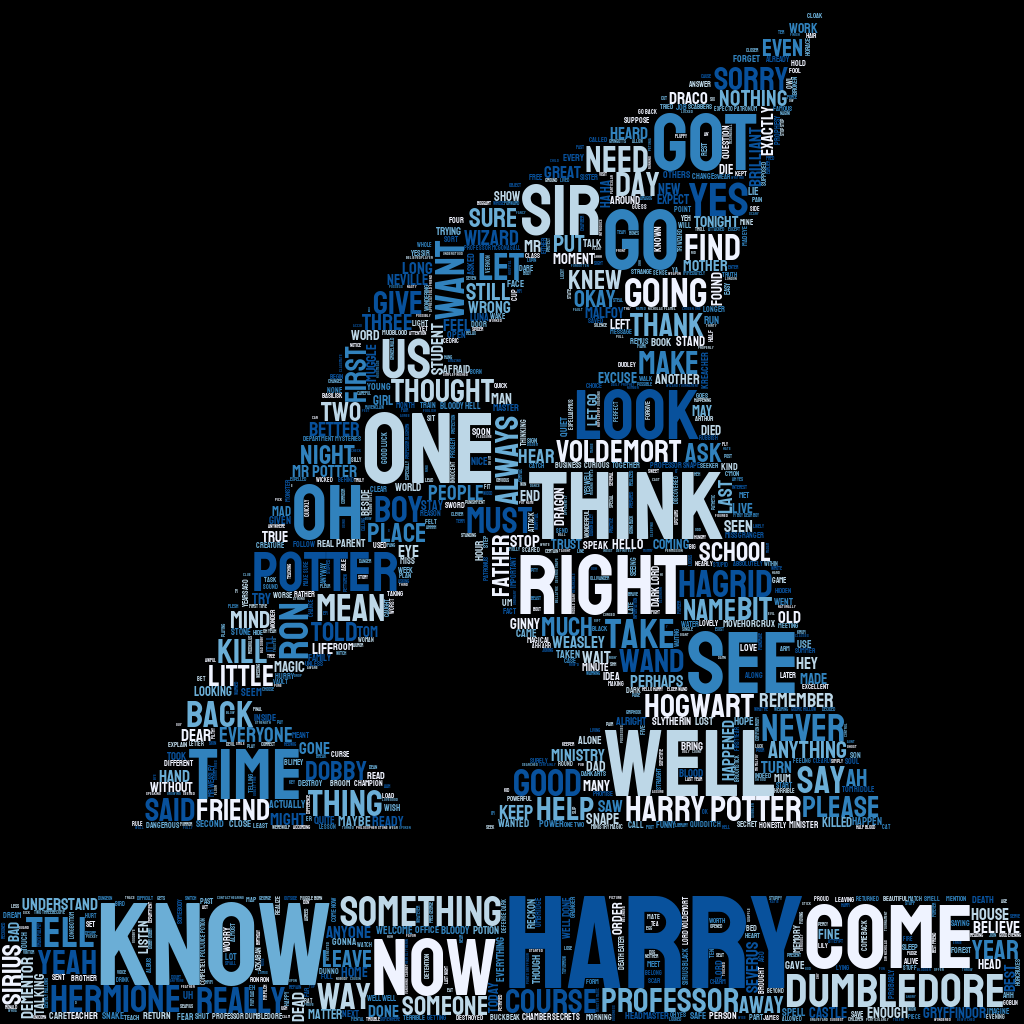

In [27]:
from IPython.display import Image
Image(filename="./stylecloud.png", width=800, height=800)

In this visualisation, we aim to create a wordcloud from all the dialogues Harry Potter series. 

**Data Preprocessing** 
- All the dialougues are used for this visulaisation and stopwords are removed 
- stylecound is used to generate this using an icon similar to sorting hat.  

**Visual Encoding**
  - The visual encoding of the word cloud displays the most common words in larger font sizes, with less common words displayed in smaller font sizes.
  
**Insights**

- Upon analyzing the word cloud, we observe that "Harry" is the most frequently mentioned word, which is not surprising given that he is the main character. 
- In addition to character names, we also notice the frequent mention of other elements such as time, wands, and Hogwarts, which are all central to the plot of the series.

# Query 5

<font size="5" color = '#740001'> <b> Word Cloud of Harry Potter's Dialogues  </b></font>

In [28]:
text = " ".join(harry_df['Dialogue'].values)

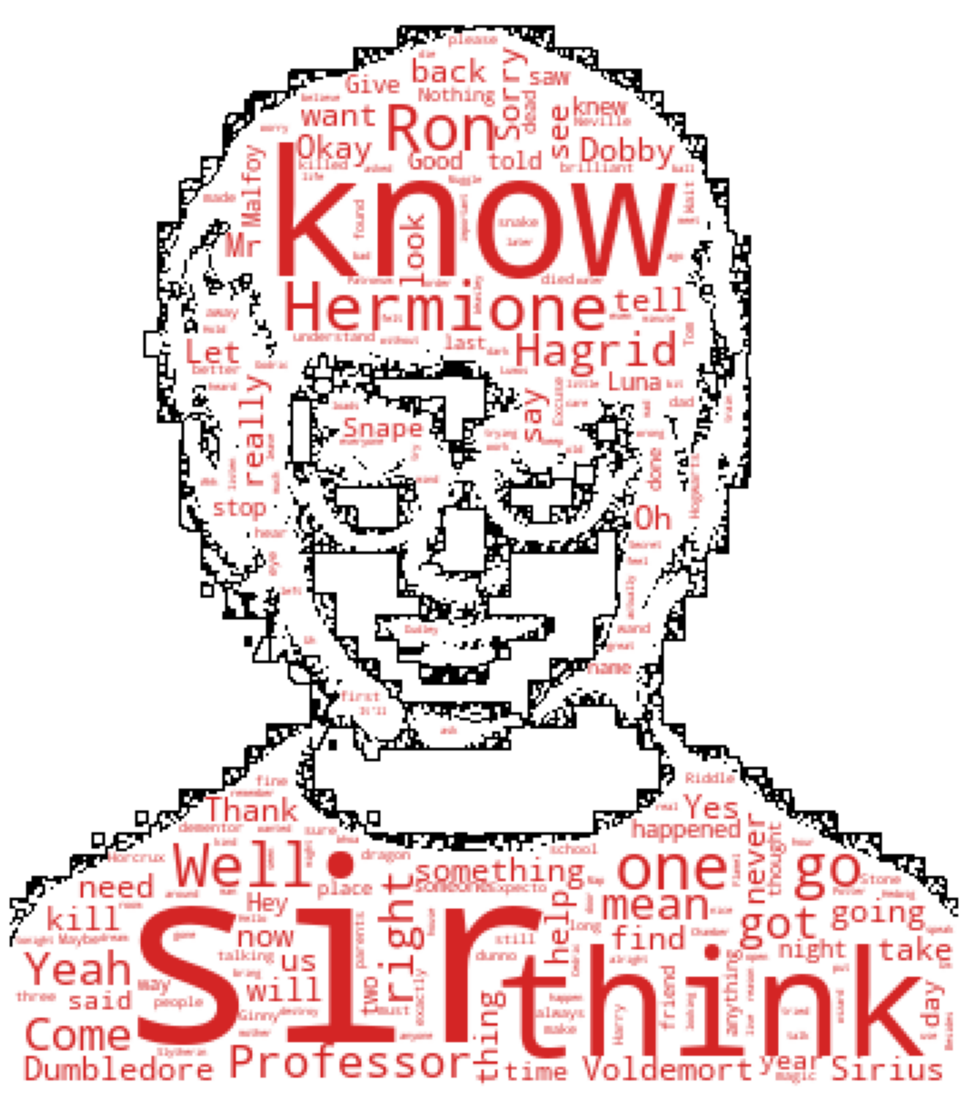

In [33]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
mask = np.array(Image.open('hp.jpg'))
wc = WordCloud(background_color = 'white', mask=mask, collocations=False,max_words=2000,max_font_size=256,\
               random_state=42, width=800,height=800,contour_color='black',contour_width=1,
              stopwords=STOPWORDS)
wc.generate(text)


def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,70%%, %d%%)" % np.random.randint(49,50))

#image_colors = ImageColorGenerator(shape)
wc.recolor(color_func=grey_color_func)
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

The objective of this visualization is to identify the most common words used in Harry Potter's dialogues in the movies.

**Data Preprocessing** 
- filter the dialogues to only those spoken by Harry and remove common stop words
- Harry Potter image converted into numpy array and is used as mask 

**Visual Encoding**
  - The visual encoding of the word cloud displays the most common words in larger font sizes, with less common words displayed in smaller font sizes.
  
**Insights**
- Harry frequently uses the word "Sir".
- he often uses words such as "think" and "know" in his dialogues. 
- The word cloud also displays the names of other important characters linked to Harry, suggesting their significance in the plot.

# Query 6

<font size="5" color = '#740001'> <b> Exploring Harry Potter's Dialogue Distribution: Which Place Category Take Center Stage? </b></font>

In [30]:
# Create a pivot table of dialogue counts by movie and place category
dialogue_counts = dialogue_df.pivot_table(index='Movie Title', columns='Place Category', values='Dialogue', aggfunc='count')

# Create a heatmap of dialogue counts by movie and place category using Plotly
fig = px.imshow(dialogue_counts, x=dialogue_counts.columns, y=dialogue_counts.index,
                color_continuous_scale='YlOrBr', title='Exploring Harry Potter\'s Dialogue Distribution: Which Place Category Take Center Stage?', width =800, height=700)

fig.show()

In this visualization we aim to understand what are the most frquest places where the Movies were shot.  

**Data Preprocessing** 
- Chapter dataset, Character dataset and Place dataset are used to extract movie titles, character names, and Place Category which are then merged with the dialogue dataset.

**Visual Encoding**
  - This visualisation is a **Heatmap**
  - **x-axis** displays  the Place Categories
  - **y-axis** shows the eight movies in the Harry Potter series
  -  The **color of the bars** represents the count of dialogues, with **yellowish color** indicating **fewer dialogues** and **reddish dialogues** indicating **more dialogues**. 
  - The **saturation of the color** corresponds to the count of the dialogues. 
  - The **text label** on each bar provides a numerical value of dialouge count . 
  
**Insights**
- The majority of dialogues in the Harry Potter movies take place inside Hogwarts. 
- However, in Deathly Hallows Part 1, none of the dialogues were spoken in Hogwarts, reflecting the plot where Harry, Hermione, and Ron searched for Horcruxes outside Hogwarts.


# References

1.	https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6
2.	https://medium.com/@sherryqixuan/topic-modeling-and-pyldavis-visualization-86a543e21f58
3.	https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5


# Appendix

# Query 7

<font size="5" color = '#740001'> <b>Exploring the Diversity of Species in Hogwarts Houses</b></font>

In [17]:
#only take 4 houses of the Hogwarts
character = character_df[character_df['House'].isin(['Gryffindor','Hufflepuff','Ravenclaw','Slytherin'])]
house_species=character.groupby(['House', 'Species']).agg({'Character ID': 'count'}).reset_index().rename(columns={'Character ID': 'count'})

# Create a stacked bar chart using Plotly
fig = px.bar(house_species, x='House', y='count', color='Species',#color_discrete_map=colors,
             barmode='stack', title='Exploring the Diversity of Species in Hogwarts Houses', text='count')

fig.update_layout(xaxis_title='House', yaxis_title='Count of Characters')
fig.update_layout(
    template = 'plotly_white',height=700, width=1000,
)
fig.show()

In this visualization, we aim to explore the diversity of Species in Hogwarts Houses

**Data Preprocessing** 
- Data of only 4 houses of Hogwarts is extracted. 

**Visual Encoding**
  - This visualisation is a **stacked bar chart**
  - **x-axis** show the 4 houses of Hogwarts 
  - **y-axis** shows the number of characters. 
  - The **color of the bars** represents the different species. 
  - The **height of the bars** represents the count of characters  
  - The **text label** on each bar provides a numerical value of characters count. 
  
**Insights**
- The human species is the most dominant in all 4 houses.
- Among the characters in Gryffindor, 4 belong to species other than human.
